In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fdm.src.fdm3t import fdm3t
from fdm.src.mfgrid import Grid
import etc

Wh(0.001, 0.3)  = (2.7449201210813685, 4.580772753804319e-09)
Wh(0.01, 0.3)   = (2.7104287908047175, 1.8261895390546826e-09)
Wh(0.1, 0.3)    = (1.6703650224009043, 5.50906758939597e-09)


In [3]:
dtypeQ   = np.dtype([('I', np.int32), ('q', float)])
dtypeH   = np.dtype([('I', np.int32), ('h', float)])
dtypeGHB = np.dtype([('I', np.int32), ('h', float), ('C', float)])

In [4]:
def brug223_02(t=None, r=None, D=None, kr=None, kz=None, ss=None, epsilon=0.67, **kw):
    """Return solution of Bruggeman 223_02, in a one-layer axially symmetric model.

    The problem is flow  outside a cyling with radius R afger sudden head change at R.
    """
    # kD = (kr * D).sum()
    # S  = (ss * D).sum()

    z = -np.cumsum(np.hstack((0, D)))
    gr = Grid(r, [-0.5, 0.5], z, axial=True)

    kr = kr[:, np.newaxis, np.newaxis] * gr.const(1.)
    kz = kz[:, np.newaxis, np.newaxis] * gr.const(1.)
    ss = ss[:, np.newaxis, np.newaxis] * gr.const(1.)

    idomain = gr.const(1, dtype=int)

    s0 = 1.0
    hi = gr.const(0.)
    #hi[:, :, 0] = s0


    fh = np.zeros(gr.nz * gr.ny, dtype=dtypeH)
    fh['I'], fh['h'] = gr.NOD[:, :, 0].ravel(), s0
    fh = {0: fh}

    out = fdm3t(gr=gr, t=t, k=(kr, kr, kz), ss=ss, fh=fh, fq=None, hi=hi, idomain=idomain, epsilon=epsilon)

    xlim = np.logspace(np.log10(t[0]), np.log10(t[-1]), 2)
    ylim = np.logspace(-4, 1, 2)

    # The head change s
    ax = etc.newfig(kw['title'],
        't [d]',
        's [m]',
        xscale='log', yscale='log',
        xlim=xlim, ylim=ylim)

    cc = etc.color_cycler()
    # select a few distances for which the show the graph
    for ir in np.hstack((0, 1, 2, 3, 4, np.arange(5, gr.nx, 5))):
        if gr.xm[ir] > 100:
            continue
        color = next(cc)
        ax.plot(t, out['Phi'][:, -1, 0, ir], '-', color=color, label=f'r={gr.xm[ir]:.3g} m')

    ax.legend()

    # The flow Q
    ylim = np.logspace(0, 5, 2)

    ax = etc.newfig(kw['title'] + "Flow Q [m3/d]",
        't [d]',
        'Q [m3/d]',
        xscale='log', yscale='log',
        xlim=xlim, ylim=ylim)

    cc = etc.color_cycler()
    # select a few distances for which the show the graph
    for ir in np.hstack((0, 1, 2, 3, 4, np.arange(5, gr.nx, 5))):
        if gr.xm[ir] > 1000:
            continue
        color = next(cc)
        ax.plot(t[1:], out['Qx'][:, -1, 0, ir], '-', color=color, label=f'r={gr.x[ir]:.3g} m')
    ax.legend()
    return ax


In [5]:
brug223_02_kwargs = {
        'title': "Bruggeman (1999) solution 223.02.""",
         'comment': """Sudden change of head at r=R.
         This solution is very difficult to correctly evaluate analytically.
         Same as Theis but sudden head change at cylinder with r=R.""",
        't': np.logspace(-3, 3, 141), # um1 = 1/ u
        'r': np.hstack((30. - 0.01, np.logspace(np.log10(30.), 6, 1 * 160))),
        'D': np.array([100.]),
        'kr': np.array([10.]),
        'kz': np.array([1e6]),
        'ss': np.array([1e-3]),
        'epsilon': 0.6,
        }


Running in axial mode, y-values are ignored.


<Axes: title={'center': 'Bruggeman (1999) solution 223.02.Flow Q [m3/d]'}, xlabel='t [d]', ylabel='Q [m3/d]'>

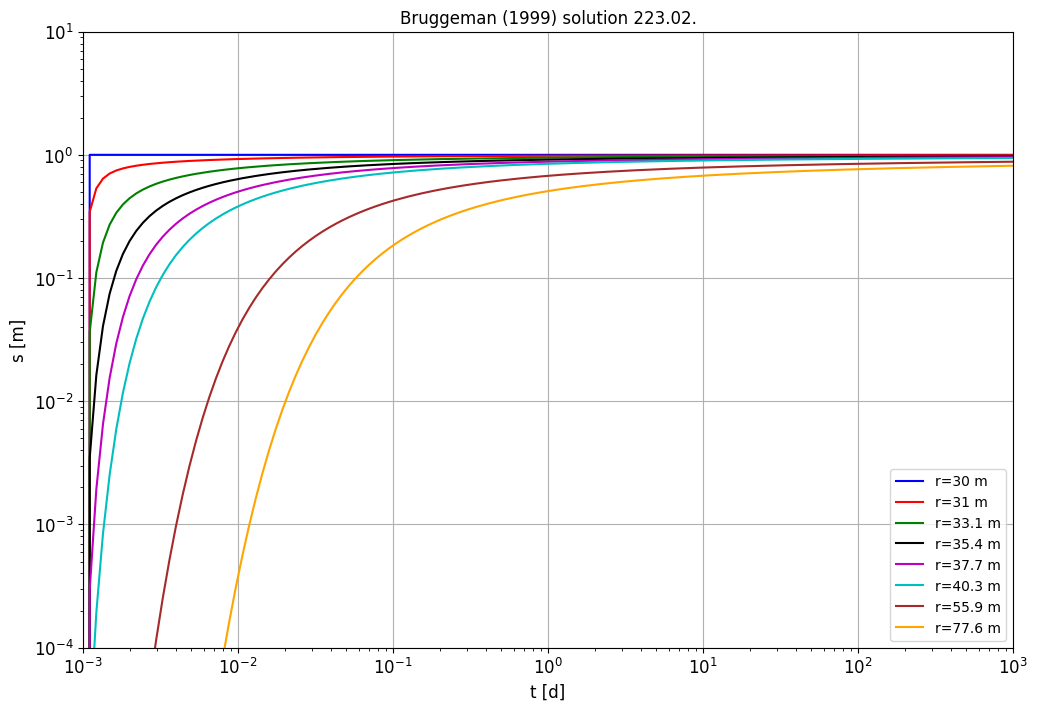

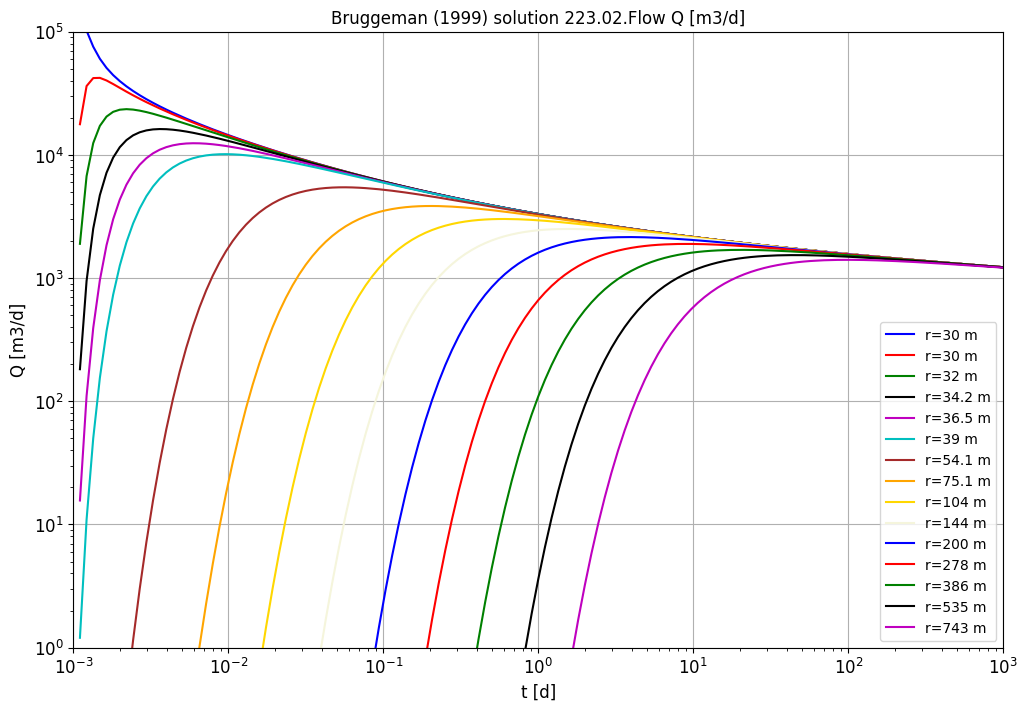

In [6]:
brug223_02(**brug223_02_kwargs)